### 1. Import libraries and define functions

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
def get_clf_eval(y_test, y_pred=None):
    confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[1]'], columns = ['pred_T[0]', 'pred_F[1]'])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [28]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx + 1
    series = series.map(my_dict)

    return series

### 1.1 load data

In [29]:
df_train = pd.read_csv("data/train.csv") # 학습용 데이터
df_test = pd.read_csv("data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [31]:
df_train['product_category'].value_counts()

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 357, dtype: int64

In [32]:
df_test['product_category'].value_counts()

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        13
control                       13
projector                     12
software solution             11
pro:centric                   10
hospital tv                   10
special signage                9
accessories                    6
ess                            4
others                    

In [33]:
df_all = pd.concat([df_train, df_test])
df_all.shape, df_train.shape, df_test.shape

((64570, 30), (59299, 29), (5271, 30))

## 2. Data preprocessing

### 전처리 baseline

In [34]:
# 열 삭제
# drop_col = ['customer_country.1', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver',
#             'product_subcategory', 'product_modelname', 'business_area', 'business_subarea', 'ver_cus', 'ver_pro']

drop_col = ['customer_country.1', 'product_subcategory', 'product_modelname', 'business_area', 'business_subarea']


df_all.drop(columns = drop_col, inplace = True)
df_all.isnull().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       48214
customer_idx                   0
customer_type              45418
enterprise                     0
historical_existing_cnt    49539
id_strategic_ver           60533
it_strategic_ver           63396
idit_strategic_ver         59359
customer_job               20172
lead_desc_length               0
inquiry_type                2233
product_category           21232
customer_position              0
response_corporate             0
expected_timeline          33271
ver_cus                        0
ver_pro                        0
ver_win_rate_x             43780
ver_win_ratio_per_bu       47360
lead_owner                     0
is_converted                5271
id                         59299
dtype: int64

In [35]:
# 결측값 0으로 넣을 컬럼
# fillna_col = ['com_reg_ver_win_rate', 'historical_existing_cnt',
#              'ver_win_rate_x', 'ver_win_ratio_per_bu']
fillna_col = ['com_reg_ver_win_rate', 'historical_existing_cnt', 'id_strategic_ver',
              'it_strategic_ver', 'idit_strategic_ver',
             'ver_win_rate_x', 'ver_win_ratio_per_bu']


for col in fillna_col:
    df_all[col] = df_all[col].fillna(0)

df_all.isnull().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate           0
customer_idx                   0
customer_type              45418
enterprise                     0
historical_existing_cnt        0
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
customer_job               20172
lead_desc_length               0
inquiry_type                2233
product_category           21232
customer_position              0
response_corporate             0
expected_timeline          33271
ver_cus                        0
ver_pro                        0
ver_win_rate_x                 0
ver_win_ratio_per_bu           0
lead_owner                     0
is_converted                5271
id                         59299
dtype: int64

In [36]:
df_all['customer_type'] = df_all['customer_type'].str.lower()
df_all['customer_type'] = df_all['customer_type'].replace(['etc.', 'other', 'others'], 'etc')
df_all['customer_type'] = df_all['customer_type'].replace(['end-customer', 'end customer', 'end-user'], 'end_user')
df_all['customer_type'] = df_all['customer_type'].replace(['specifier/ influencer', 'specifier / influencer'], 'influencer')
df_all['customer_type'] = df_all['customer_type'].replace(['homeowner', 'home owner'], 'home_owner')
df_all['customer_type'] = df_all['customer_type'].replace(['software/solution provider', 'software / solution provider'], 'solution_provider')
df_all['customer_type'] = df_all['customer_type'].replace(['engineer', 'hvac engineer'], 'engineer')
df_all['customer_type'] = df_all['customer_type'].replace(['distributor', 'dealer/distributor'], 'distributor')
df_all['customer_type'].fillna('etc', inplace = True)

In [37]:
# value_counts 가 1개인 것들 etc로 분류
value_counts = df_all['customer_type'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['customer_type'] = df_all['customer_type'].apply(lambda x: 'etc' if x in values_to_replace else x)

In [38]:
df_all['customer_job'].value_counts().head(10)# 일단 대기

customer_job
engineering               7070
other                     4876
administrative            3666
education                 2695
sales                     2380
information technology    2168
operations                2156
purchasing                2118
business development      1965
consulting                1515
Name: count, dtype: int64

In [39]:
df_all['inquiry_type'] = df_all['inquiry_type'].str.lower()
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['etc.', 'other', 'other_', 'others'], 'etc')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['sales inquiry', 'sales', 'probeam precio'], 'sales inquiry')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['quotation or purchase consultation', 'request for quotation or purchase', 'quotation_or_purchase_consultation', 'purchase or quotation', 'quotation_', 'purchase'], 'quotation_or_purchase_consultation')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['usage or technical consultation', 'technical consultation', 'request for technical consulting', 'usage_or_technical_consultation', 'technical_consultation', 'technical'], 'usage or technical consultation')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['vui lòng báo giá giúp mình sản phẩm đo thân nhiệt xin cảm ơn', 'tôi cần tham khảo giá và giải pháp từ lg'], 'quotation_or_purchase_consultation')
df_all['inquiry_type'] = df_all['inquiry_type'].replace(['toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung'], 'product information')

In [40]:
# value_counts 가 1개인 것들 etc로 분류
value_counts = df_all['inquiry_type'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['inquiry_type'] = df_all['inquiry_type'].apply(lambda x: 'etc' if x in values_to_replace else x)

In [41]:
df_all['inquiry_type'].fillna('etc', inplace = True)

In [42]:
# 전처리 필요한 4개 컬럼 간단하게
value_counts = df_all['customer_job'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['customer_job'] = df_all['customer_job'].apply(lambda x: 'other' if x in values_to_replace else x)
df_all['customer_job'].fillna('other', inplace = True)

value_counts = df_all['product_category'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['product_category'] = df_all['product_category'].apply(lambda x: 'etc' if x in values_to_replace else x)
df_all['product_category'].fillna('etc', inplace = True)

value_counts = df_all['expected_timeline'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['expected_timeline'] = df_all['expected_timeline'].apply(lambda x: 'etc' if x in values_to_replace else x)
df_all['expected_timeline'].fillna('etc', inplace = True)

value_counts = df_all['customer_country'].value_counts()
values_to_replace = value_counts[value_counts == 1].index
df_all['customer_country'] = df_all['customer_country'].apply(lambda x: 'etc' if x in values_to_replace else x)
df_all['customer_country'].fillna('etc', inplace = True)

In [43]:
df_all.isnull().sum()

bant_submit                    0
customer_country               0
business_unit                  0
com_reg_ver_win_rate           0
customer_idx                   0
customer_type                  0
enterprise                     0
historical_existing_cnt        0
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
customer_job                   0
lead_desc_length               0
inquiry_type                   0
product_category               0
customer_position              0
response_corporate             0
expected_timeline              0
ver_cus                        0
ver_pro                        0
ver_win_rate_x                 0
ver_win_ratio_per_bu           0
lead_owner                     0
is_converted                5271
id                         59299
dtype: int64

In [44]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [45]:
df_train = df_all.iloc[:len(df_train)]
df_test = df_all.iloc[len(df_train):]

In [46]:
df_train.shape, df_test.shape

((59299, 25), (5271, 25))

### 모델링

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# 2/3 => 1.5 : 1
# 0.5 => 2 : 1
X_resampled, y_resampled = RandomUnderSampler(sampling_strategy= 2/3, random_state=42).fit_resample(df_train.drop(["is_converted", 'id'], axis=1), df_train["is_converted"].astype(int))
y_resampled.sum(), len(y_resampled)

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

(4850, 12125)

In [48]:
x_train, x_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    stratify=y_resampled,
    test_size=0.2,
    random_state=42,
)

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
rf_clf = RandomForestClassifier(random_state=42, oob_score = True)
param_grid = {'n_estimators' : np.arange(20, 101, 10),  'max_samples' : [0.8], 
              'max_features' : [0.8], 'criterion' : ["gini", "entropy", "log_loss"]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid, verbose = True, scoring='f1')
grid_rf_clf.fit(x_train, y_train)

print('최적의 파라미터 :', grid_rf_clf.best_params_)

In [24]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=80, criterion = 'entropy', 
                                max_features = 0.8, max_samples = 0.8, class_weight = {0: 1, 1:1}, oob_score = True)
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_val)
get_clf_eval(y_val, y_pred)

x_test = df_test.drop(["is_converted", "id"], axis=1)
test_pred = rf_clf.predict(x_test)
sum(test_pred), len(test_pred) # True로 예측된 개수

c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

오차행렬:
       pred_T[0]  pred_F[1]
T[0]       1370         85
F[1]         93        877

정확도: 0.9266
정밀도: 0.9116
재현율: 0.9041
F1: 0.9079


c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is

(1667, 5271)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


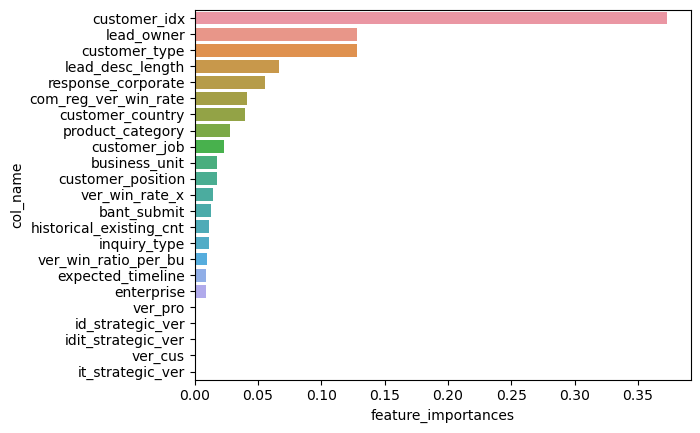

In [25]:
# 변수 중요도
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in rf_clf.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(x_train.columns),importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importances']
feature_importances = feature_importances.sort_values(by = 'feature_importances', ascending= False).reset_index(drop = True)

# 변수중요도 시각화
sns.barplot(data = feature_importances, y = 'col_name', x = 'feature_importances')
plt.show()

### 여러가지 분류기

In [192]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

In [182]:
xgb = XGBClassifier(random_state=42)
param_grid = {'n_estimators' : [400, 500, 600, 700], 'learning_rate' : np.arange(0.01, 0.11, 0.02),
             'subsample' : [0.8], 'colsample_bytree' : [0.8]}

grid_xgb = GridSearchCV(xgb, param_grid, verbose = True, scoring='f1')
grid_xgb.fit(x_train, y_train)

print('최적의 파라미터 :', grid_xgb.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
최적의 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.049999999999999996, 'n_estimators': 500, 'subsample': 0.8}


In [201]:
y_pred = grid_xgb.predict(x_val.fillna(0))
get_clf_eval(y_val, y_pred)

x_test = df_test.drop(["is_converted", "id"], axis=1)
test_pred = grid_xgb.predict(x_test.fillna(0))
sum(test_pred), len(test_pred) # True로 예측된 개수

오차행렬:
       pred_T[0]  pred_F[1]
T[0]        907         66
F[1]         50        917

정확도: 0.9402
정밀도: 0.9329
재현율: 0.9483
F1: 0.9405


(1825, 5271)

In [202]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

In [184]:
cat = CatBoostClassifier(random_state=42, verbose = False)
param_grid = {'iterations' : [800, 900, 1000, 1100], 'learning_rate' : np.arange(0.05, 0.15, 0.02),
             'subsample' : [0.8], 'colsample_bylevel' : [0.8]}

grid_cat = GridSearchCV(cat, param_grid, verbose = True, scoring='f1')
grid_cat.fit(x_train.fillna(0), y_train.astype(int))

print('최적의 파라미터 :', grid_cat.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
최적의 파라미터 : {'colsample_bylevel': 0.8, 'iterations': 900, 'learning_rate': 0.09000000000000001, 'subsample': 0.8}


In [186]:
y_pred = grid_cat.predict(x_val)
get_clf_eval(y_val, y_pred)

x_test = df_test.drop(["is_converted", "id"], axis=1)
test_pred = grid_cat.predict(x_test)
sum(test_pred), len(test_pred) # True로 예측된 개수

오차행렬:
       pred_T[0]  pred_F[1]
T[0]        904         69
F[1]         48        919

정확도: 0.9397
정밀도: 0.9302
재현율: 0.9504
F1: 0.9402


(1814, 5271)

In [188]:
lgbm = LGBMClassifier(random_state = 42, verbose = 0)
param_grid = {'learning_rate': np.arange(0.07, 0.14, 0.02), 'n_estimators': [100, 200, 300, 400, 500],
              'colsample_bytree': [0.8],'subsample': [0.8]}

grid_lgbm = GridSearchCV(lgbm, param_grid, verbose = True, scoring='f1')
grid_lgbm.fit(x_train, y_train)

print('최적의 파라미터 :', grid_lgbm.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
최적의 파라미터 : {'colsample_bytree': 0.8, 'learning_rate': 0.11000000000000001, 'n_estimators': 300, 'subsample': 0.8}


In [190]:
y_pred = grid_lgbm.predict(x_val)
get_clf_eval(y_val, y_pred)

x_test = df_test.drop(["is_converted", "id"], axis=1)
test_pred = grid_lgbm.predict(x_test)
sum(test_pred), len(test_pred) # True로 예측된 개수

오차행렬:
       pred_T[0]  pred_F[1]
T[0]        909         64
F[1]         50        917

정확도: 0.9412
정밀도: 0.9348
재현율: 0.9483
F1: 0.9415


(1908, 5271)

In [194]:
from sklearn.ensemble import VotingClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=80, criterion = 'entropy', 
                                max_features = 0.8, max_samples = 0.8, class_weight = {0: 1, 1:1}, oob_score = True)
rf_clf.fit(x_train, y_train)

xgb = XGBClassifier(random_state=42, colsample_bytree = 0.8, 
                    learning_rate = 0.05, n_estimators = 450, subsample = 0.8)
xgb.fit(x_train, y_train)

cat = CatBoostClassifier(random_state=42, verbose = False, colsample_bylevel = 0.8, 
                         iterations = 900, learning_rate = 0.09, subsample = 0.8)
cat.fit(x_train, y_train.astype(int))

lgbm = LGBMClassifier(random_state = 42, verbose = 0, colsample_bytree = 0.8,
                      learning_rate = 0.11, n_estimators = 300, subsample = 0.8)
lgbm.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.11, n_estimators=300,
               random_state=42, subsample=0.8, verbose=0)

In [195]:
vote = VotingClassifier(estimators= [('xgb',xgb), ('rf_clf', rf_clf), ('cat', cat), ('lgbm', lgbm)], voting= 'soft')
vote.fit(x_train, y_train)

y_pred = vote.predict(x_val)
get_clf_eval(y_val, y_pred)

x_test = df_test.drop(["is_converted", "id"], axis=1)
test_pred = vote.predict(x_test)
sum(test_pred), len(test_pred)

오차행렬:
       pred_T[0]  pred_F[1]
T[0]        910         63
F[1]         53        914

정확도: 0.9402
정밀도: 0.9355
재현율: 0.9452
F1: 0.9403


(1906, 5271)